In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('../datasets/d5.csv')

In [4]:
df

,Date,Energy Consumption
0,2020-01-01,305.311409
1,2020-01-02,299.374329
2,2020-01-03,307.646359
3,2020-01-04,316.811967
4,2020-01-05,299.651923
...,...,...
1455,2023-12-26,380.398916
1456,2023-12-27,405.951747
1457,2023-12-28,402.642110
1458,2023-12-29,412.140555


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour  # Assuming timestamps are present, otherwise this will be 0
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday
df['Season'] = df['Date'].dt.month % 12 // 3 + 1  # Rough estimate for seasons

season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['Season'] = df['Season'].map(season_map)


In [11]:
print(df['Season'].unique())

['Winter' 'Spring' 'Summer' 'Fall']


In [12]:
print(df['Energy Consumption'].describe())

count    1460.000000
mean      350.451726
std        31.566215
min       265.886301
25%       324.913290
50%       349.962555
75%       375.550666
max       424.172656
Name: Energy Consumption, dtype: float64


In [13]:
print(df.isnull().sum())

Date                  0
Energy Consumption    0
Year                  0
Month                 0
Day                   0
Hour                  0
Weekday               0
Season                0
dtype: int64


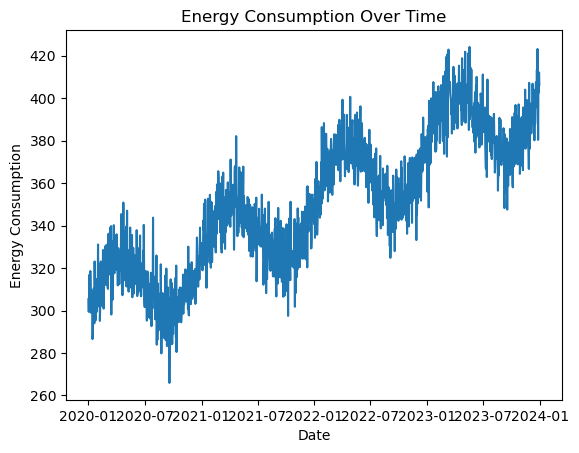

In [15]:
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Energy Consumption'])
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.show()

In [16]:
seasonal_consumption = df.groupby('Season')['Energy Consumption'].mean()
print(seasonal_consumption)

Season
Fall      340.465463
Spring    362.253085
Summer    347.041145
Winter    351.971706
Name: Energy Consumption, dtype: float64


In [17]:
weekday_consumption = df.groupby('Weekday')['Energy Consumption'].mean()
print(weekday_consumption)

Weekday
0    350.095751
1    351.346271
2    350.906694
3    350.468501
4    349.561613
5    351.328479
6    349.452565
Name: Energy Consumption, dtype: float64


In [18]:
correlation_matrix = df[['Energy Consumption', 'Month', 'Weekday']].corr()
print(correlation_matrix)

                    Energy Consumption     Month   Weekday
Energy Consumption            1.000000 -0.116725 -0.007474
Month                        -0.116725  1.000000 -0.001993
Weekday                      -0.007474 -0.001993  1.000000


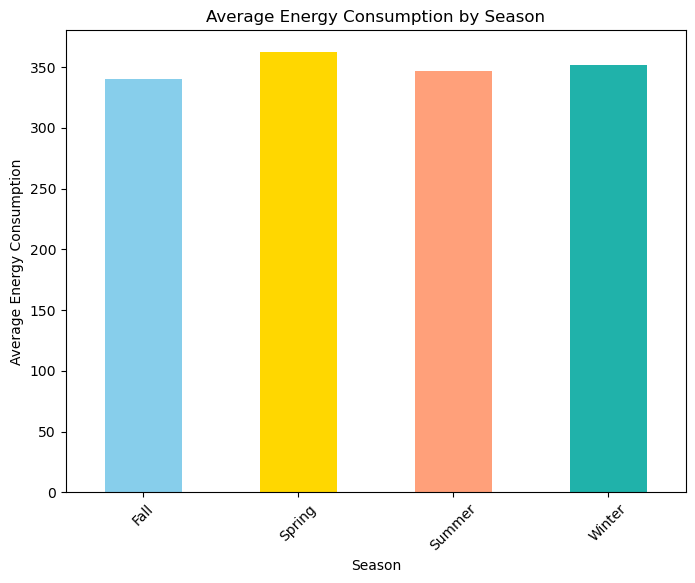

In [21]:
import matplotlib.pyplot as plt

# Assuming 'seasonal_consumption' is the Series from your previous analysis
# with average energy consumption values for each season
seasonal_consumption = df.groupby('Season')['Energy Consumption'].mean()

# Plotting
plt.figure(figsize=(8, 6))
seasonal_consumption.plot(kind='bar', color=['#87CEEB', '#FFD700', '#FFA07A', '#20B2AA'])
plt.xlabel('Season')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption by Season')
plt.xticks(rotation=45)
plt.show()

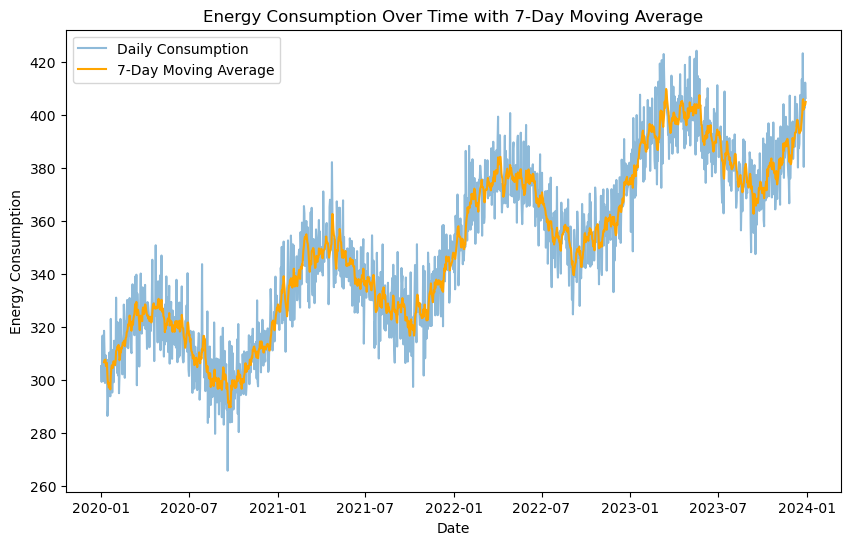

In [22]:
# 7-day moving average for weekly smoothing
df['7-day Moving Average'] = df['Energy Consumption'].rolling(window=7).mean()

# Plotting original data and moving average
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Energy Consumption'], label='Daily Consumption', alpha=0.5)
plt.plot(df['Date'], df['7-day Moving Average'], label='7-Day Moving Average', color='orange')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Over Time with 7-Day Moving Average')
plt.legend()
plt.show()

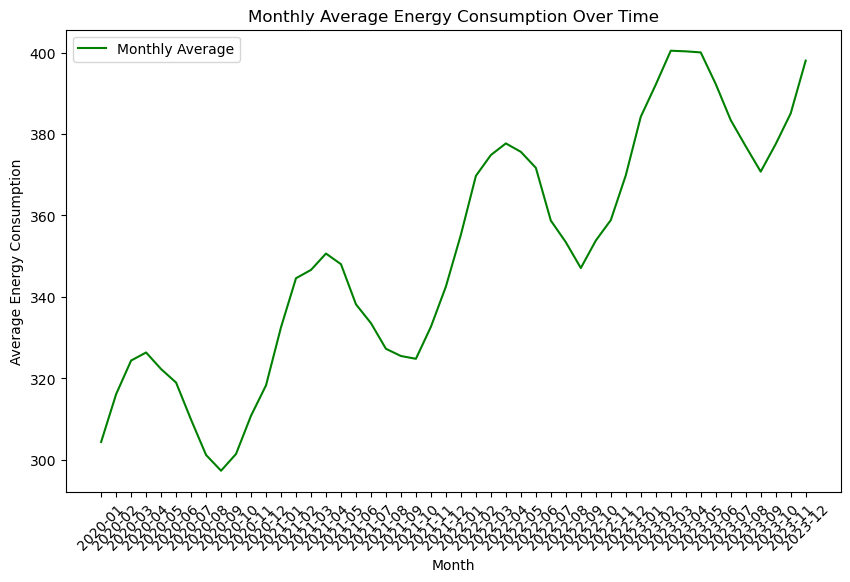

In [23]:
# Calculate monthly averages
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Energy Consumption'].mean()

# Plotting monthly average
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index.astype(str), monthly_avg.values, label='Monthly Average', color='green')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption')
plt.title('Monthly Average Energy Consumption Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [26]:
df['Month'] = df['Date'].dt.month
df_consumption = df.groupby('Month')['Energy Consumption'].mean().reset_index()
df_consumption.columns = ['Month', 'Average Energy Consumption']

print(df_consumption)

    Month  Average Energy Consumption
0       1                  344.113029
1       2                  355.289326
2       3                  361.573121
3       4                  363.745319
4       5                  361.488953
5       6                  355.278048
6       7                  346.390618
7       8                  339.720476
8       9                  335.169267
9      10                  339.406751
10     11                  346.855662
11     12                  356.846379


In [27]:
import calendar
df_consumption['Month'] = df_consumption['Month'].apply(lambda x: calendar.month_name[x])

print(df_consumption)

        Month  Average Energy Consumption
0     January                  344.113029
1    February                  355.289326
2       March                  361.573121
3       April                  363.745319
4         May                  361.488953
5        June                  355.278048
6        July                  346.390618
7      August                  339.720476
8   September                  335.169267
9     October                  339.406751
10   November                  346.855662
11   December                  356.846379


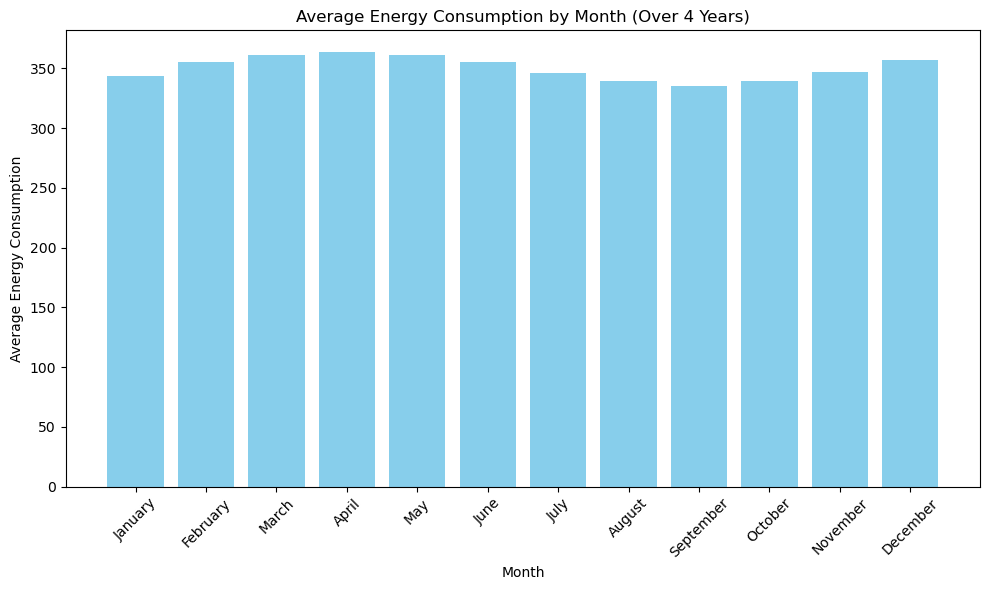

In [28]:
df_consumption['Month'] = pd.Categorical(df_consumption['Month'], 
                                          categories=list(calendar.month_name)[1:], 
                                          ordered=True)
df_consumption = df_consumption.sort_values('Month')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_consumption['Month'], df_consumption['Average Energy Consumption'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption by Month (Over 4 Years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

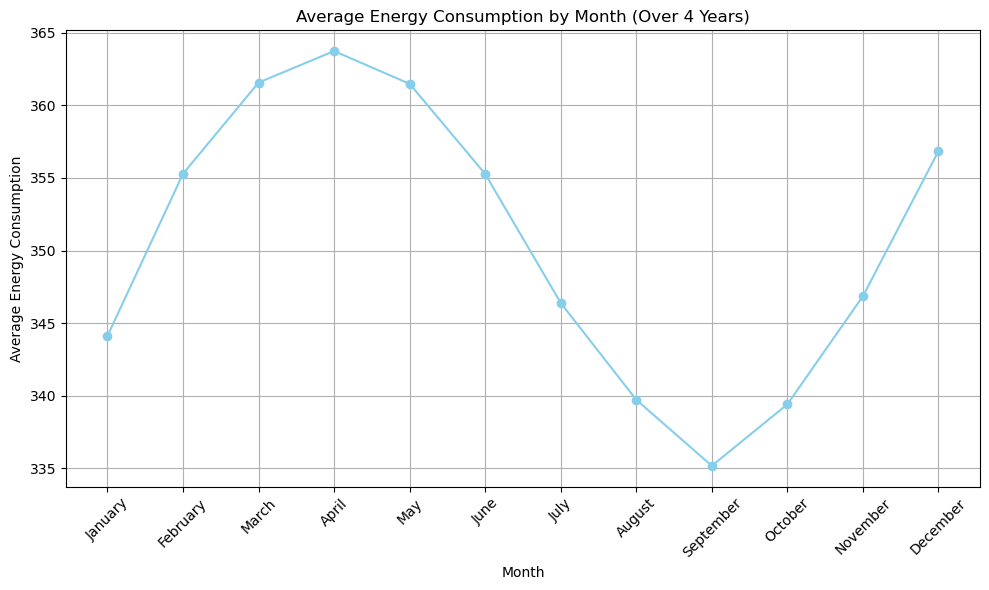

In [29]:
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df_consumption['Month'], df_consumption['Average Energy Consumption'], marker='o', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption by Month (Over 4 Years)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

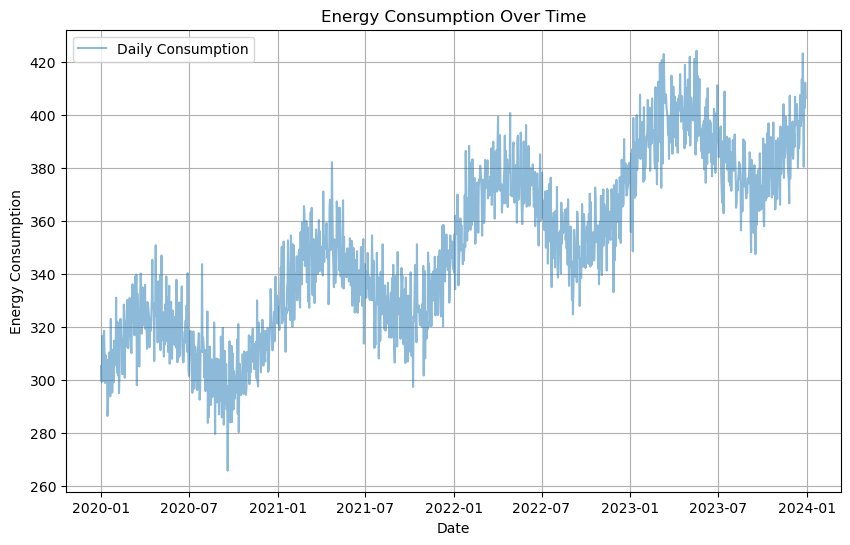

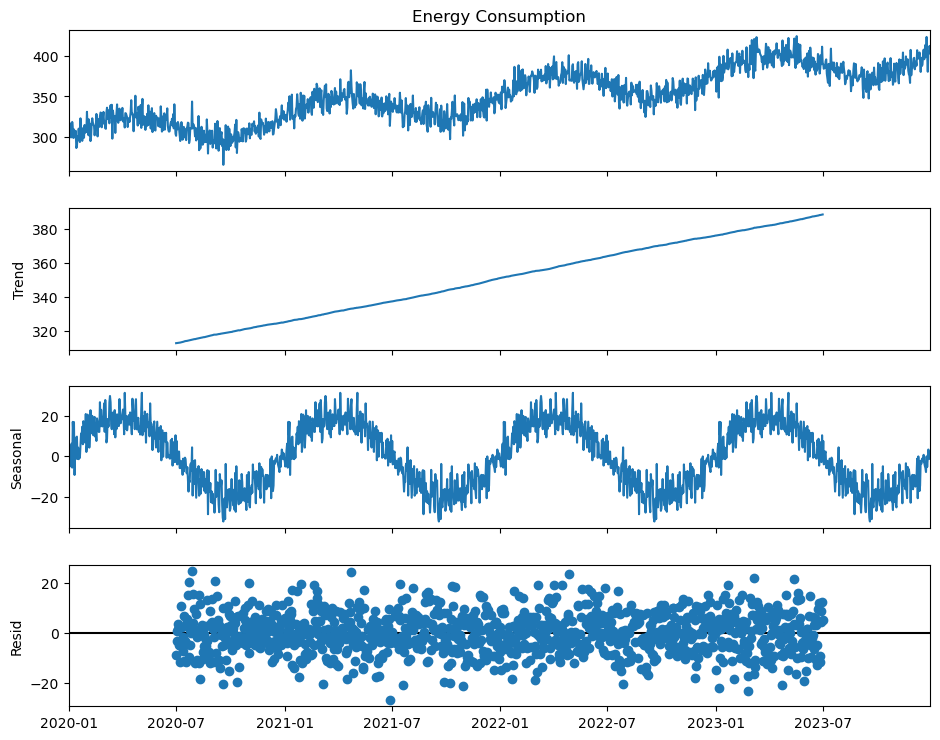

In [30]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Overall Trend Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Energy Consumption'], label='Daily Consumption', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.grid()
plt.legend()
plt.show()

# Seasonal Decomposition
decomposition = sm.tsa.seasonal_decompose(df.set_index('Date')['Energy Consumption'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()